Bir doğrusal model basitçe giriş verilerinin ağırlıklı toplamına bias term olarak adlandırılan(ayrıca intercept olarak da adlandırılır.) bir sabit ekleyerek bir tahmin yapar. Denklemini yazacak olursak:

<b>*Doğrusal Regresyon model tahmini*</b>

<center>$\hat{y} = \theta_0+\theta_1 x_1+\theta_2 x_2+...+\theta_n x_n$</center>

Bu denklemde:
* $\hat{y}$ tahmin edilen değerdir.
* *n* özellik sayısıdır.
* $x_i$ i'inci özelliğin değeridir.
* $\theta_j$ j'inci model parametresidir(bias terimi $\theta_0$ ve özellik ağırlıkları $\theta_1$,$\theta_2$,...,$\theta_n$ dahil).

Bu denklem, aşağıda gösterildiği gibi, vektörize edilmiş bir form kullanılarak çok daha kısa bir şekilde yazılabilir.

<b>*Doğrusal Regresyon model tahmini (vektör formu)*</b>

<center>$\hat{y}=h_0(x)=\theta⋅x$</center>

Bu denklemde:
* $\theta$ : $\theta_0$ bias terimini  ve $\theta_1$'den $\theta_n$'e kadar özellik ağırlarını içeren modelin parametre vektörüdür.
* <b>x</b> : $x_0$'dan $x_n$'e kadar($x_0$ her zaman 1'dir) özellikleri içeren, örneklerin özellik vektörüdür.
* $\theta⋅x$ : $\theta$ ve <b>x</b> vektörlerinin skaler çarpımıdır ve bu çarpım $\theta_0+\theta_1 x_1+\theta_2 x_2+...+\theta_n x_n$ bu denkleme eşittir.
* $h_\theta$ :  $\theta$ model parametrelerini kullanan hipotez fonksiyonudur.

Peki bu doğrusal regresyon modeli nasıl eğiilir? Bir modeli eğitmek, modelin eğitim setine en iyi uyacak(fit) şekilde model parametrelerini ayarlamaktır. Bu amaçla,ilk olarak modelin eğitim setine ne kadar iyi veya ne kadar kötü uyduyunun bir ölçüsüne ihtiyacımız var. Bir regresyon modeli için en çok kullanılan performans ölçüsü olan Root Mean Square Error'dur. Bunun için bir doğrusal regresyon modelini eğitmek için, RMSE'yi minimize eden $\theta$ parametrelerini bulmamız gerekir. Uygulamada mean sqaured error(MSE) minimize etmek daha kolaydır ve her ikiside aynı sonuca götürür. 

Bir <b>X</b> eğitim setinde, $h_\theta$ Doğrusal Regresyon hipotezinin MSE'si:

Doğrusal Regresyon modeli için maliyet fonskiyonu:

$MSE(X,h\theta)=\dfrac1{m}\sum\limits_{i=1}^{m}{(\theta^{T}x^{(i)}-y^{(i)})^2}$

Daha basitçe göstermek için  $MSE(X,h_\theta)$ yerine $MSE(\theta)$ yazacağız.

## Normal Denklem

Maliyet fonksiyonunun $\theta$ parametrelerini bulmak için kullanılan yöntemlerden biridir. Sonucu direkt verir(iteratif bir yaklaşım kullanmaz).

Normal Denklem:

$\hat\theta = (X^TX)^{-1}X^Ty$

Bu denklemde: 
* $\hat\theta$ : maliyet fonksiyonunun minimize eden \theta değeridir.
* $y$ : $y^1$ 'den $y^m$'ye kadar hedef değerleri içeren hedef değerler vektörüdür.

Bu denklemi test etmek için bazı doğrusal görünümlü veriler oluşturalım:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

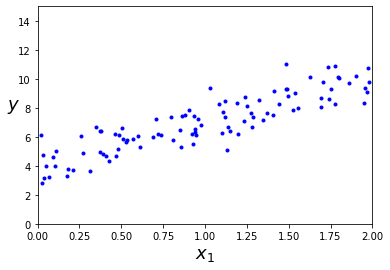

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Şimdi Normal Denkemi kullanarak $\theta$'yı hesaplayalım. Matrisin tersini hesaplamak için NumPy'ın algebra modülünden inv() metodunu ve skaler çarpım için dot() metodunu kullanacağız.

In [3]:
X_b=np.c_[np.ones((len(X),1)),X] # tüm örnekleri x0=1'i ekliyoruz.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Veri oluşturmak için kullandığımız fonksiyon $y=4+3x_1+$Gaussian gürültüsü idi. Şimdi Normal Denklemin bulduğu değerlere bakalım:

In [4]:
theta_best

array([[4.00896324],
       [3.03754674]])

Oldukça yakın, ancak gürültü orijinal fonksiyonun tam parametreleri değerlerini almasını imkansız hale getiriyor.

Şimdi $\theta$'yı kullanarak tahmin yapalım:

In [5]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((len(X_new),1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00896324],
       [10.08405673]])

Şimdi modelin taminlerini çizelim:

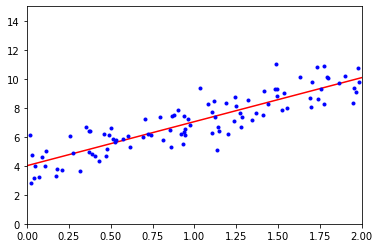

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Scikit-Learn kullanarak Doğrusal Regresyon gerçekleştirmek oldukça kolaydır:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.00896324],
       [10.08405673]])